## Checkpoint 2 

Use the code below to generate the data for two classes.

Implement a neural network that is capable of correctly classifying the data, using its own RM (student identifier) ​​as a parameter.

Exemple:

- RM = abcde
- nData = 100 * (a+b+c+d+e)
- nVertices = 1 * maximum(a,b,c,d,e)

In [1]:
# Run this cell, but don't change this function

import numpy as np
import matplotlib.pyplot as plt

def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

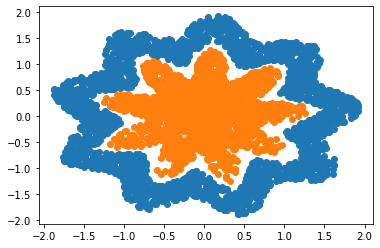

In [2]:
# Put your RM here

RM = [9,3,4,8,0]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

# Generating the data

c1, c2 = generate_data(nData,nVertices)

# Plotting the data

plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

plt.show()

Comment on the decision of each parameter used:

Will be evaluated:

    - Code structure;
    - Tests;
    - Number of neurons;
    - Number of layers in each neuron;
    - Adaptation algorithm;
    - Adaptation algorithm parameters;
    - Activation functions.

### Preprocessing

In [3]:
# Imports

import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

#### Splitting

In [4]:
# Preparing the X and Y data

x = np.concatenate((c1, c2), axis=0)
y = np.concatenate((np.zeros(nData), np.ones(nData)), axis=0)

# Splitting training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model construction

In [14]:
# Creation of model neurons

model = keras.Sequential([

    layers.Dense(8, input_shape=(2,)),

    layers.Dense(8, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

# Model compilation

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Displaying the model summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 24        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


### Training

In [15]:
# Training the models

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

# Training model

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print(f'Acurácia Treino: {train_acc}')

# Test model

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'Acurácia Teste: {test_acc}')


Epoch 1/15
96/96 [==============================] - 1s 4ms/step - loss: 0.6420 - accuracy: 0.6335 - val_loss: 0.6058 - val_accuracy: 0.7760
Epoch 2/15
96/96 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.8216 - val_loss: 0.5198 - val_accuracy: 0.8438
Epoch 3/15
96/96 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8835 - val_loss: 0.4370 - val_accuracy: 0.9180
Epoch 4/15
96/96 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.9323 - val_loss: 0.3663 - val_accuracy: 0.9245
Epoch 5/15
96/96 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.9417 - val_loss: 0.3015 - val_accuracy: 0.9479
Epoch 6/15
96/96 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9515 - val_loss: 0.2511 - val_accuracy: 0.9440
Epoch 7/15
96/96 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9564 - val_loss: 0.2159 - val_accuracy: 0.9648
Epoch 8/15
96/96 [==

### Result evaluation

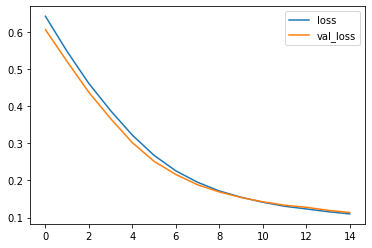

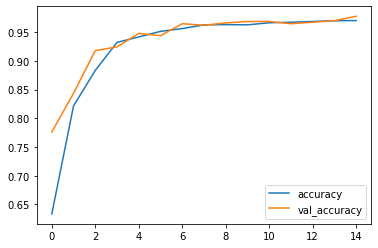

In [16]:
# Displaying the graphs of the Loss and Accuracy functions

history_df = pd.DataFrame(history.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();

In [17]:
# Test

y_pred = np.round(model.predict(x_test))
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Calculating the results

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Displaying the results

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

30/30 [==============================] - 0s 1ms/step
Accuracy: 0.975
Precision: 0.975
Recall: 0.975
F1-Score: 0.975


### Final results

- Activaion functions: 'relu' e 'sigmoid'
- Optimizer: 'adam'
- Loss metrics: 'binary_crossentropy'
- Accuracy metrics: ['accuracy']

- Total layers: 3
- Total parameters: 105
- Accuracy: 0.975

### Considerations

Points observed during the project:

    - There were no significant changes in model accuracy when using more than 3 layers of neurons;

    - The use of layers with density (8, 8 and 1) was defined because values ​​lower than this drastically reduced the accuracy of the model and higher values ​​did not generate significant improvements;

    - The use of Dropout and BatchNormalization ended up reducing the accuracy of the model, so its use was discarded;

    - ther were no signifficant changes in model accuracy when training more than 15 ephochs.

    - It was observed that the use of Batch Size, in several tests, had a greater chance of generating a less accurate model and when it generated an acceptable model, it reached values ​​similar to the current model.